In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from scipy import stats


In [3]:
control = pd.read_csv("control_group.csv", sep=";")
test = pd.read_csv("test_group.csv", sep=";")

In [4]:
control.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [9]:
df=pd.concat([control,test],ignore_index=True)
df.tail()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
55,Test Campaign,26.08.2019,2311,80841.0,61589.0,3820.0,2037.0,1046.0,346.0,284.0
56,Test Campaign,27.08.2019,2915,111469.0,92159.0,6435.0,2976.0,2552.0,992.0,771.0
57,Test Campaign,28.08.2019,2247,54627.0,41267.0,8144.0,2432.0,1281.0,1009.0,721.0
58,Test Campaign,29.08.2019,2805,67444.0,43219.0,7651.0,1920.0,1240.0,1168.0,677.0
59,Test Campaign,30.08.2019,1977,120203.0,89380.0,4399.0,2978.0,1625.0,1034.0,572.0


In [15]:
df.columns = (
    df.columns
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("#_", "")
    .str.replace("[usd]", "usd")
)
df.head(2)


,campaign_name,date,spend_usd,of_impressions,reach,of_website_clicks,of_searches,of_view_content,of_add_to_cart,of_purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0


In [16]:
df["variant"] = np.where(
    df["campaign_name"].str.contains("Control", case=False),
    "Control",
    "Test"
)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   campaign_name      60 non-null     object 
 1   date               60 non-null     object 
 2   spend_usd          60 non-null     int64  
 3   of_impressions     59 non-null     float64
 4   reach              59 non-null     float64
 5   of_website_clicks  59 non-null     float64
 6   of_searches        59 non-null     float64
 7   of_view_content    59 non-null     float64
 8   of_add_to_cart     59 non-null     float64
 9   of_purchase        59 non-null     float64
 10  variant            60 non-null     object 
dtypes: float64(7), int64(1), object(3)
memory usage: 5.3+ KB


In [19]:
df.tail()

,campaign_name,date,spend_usd,of_impressions,reach,of_website_clicks,of_searches,of_view_content,of_add_to_cart,of_purchase,variant
55,Test Campaign,26.08.2019,2311,80841.0,61589.0,3820.0,2037.0,1046.0,346.0,284.0,Test
56,Test Campaign,27.08.2019,2915,111469.0,92159.0,6435.0,2976.0,2552.0,992.0,771.0,Test
57,Test Campaign,28.08.2019,2247,54627.0,41267.0,8144.0,2432.0,1281.0,1009.0,721.0,Test
58,Test Campaign,29.08.2019,2805,67444.0,43219.0,7651.0,1920.0,1240.0,1168.0,677.0,Test
59,Test Campaign,30.08.2019,1977,120203.0,89380.0,4399.0,2978.0,1625.0,1034.0,572.0,Test


In [20]:
df.groupby("variant").size()

variant
Control    30
Test       30
dtype: int64

In [24]:
funnel=df.groupby("variant").agg(
    impression=("of_impressions","sum"),
    clicks=("of_website_clicks", "sum"),
    views=("of_view_content", "sum"),
    add_to_cart=("of_add_to_cart", "sum"),
    purchases=("of_purchase", "sum"),
    spend=("spend_usd", "sum")
).reset_index()

In [25]:
funnel

,variant,impression,clicks,views,add_to_cart,purchases,spend
0,Control,3177233.0,154303.0,56370.0,37700.0,15161.0,68653
1,Test,2237544.0,180970.0,55740.0,26446.0,15637.0,76892


In [29]:
funnel['ctr']= funnel['clicks']/ funnel['impression']
funnel['view_rate']= funnel['views']/ funnel['clicks']
funnel["add_to_cart_rate"] = funnel["add_to_cart"] / funnel["views"]
funnel["conversion_rate"] = funnel["purchases"] / funnel["clicks"]

funnel

,variant,impression,clicks,views,add_to_cart,purchases,spend,ctr,view_rate,add_to_cart_rate,conversion_rate
0,Control,3177233.0,154303.0,56370.0,37700.0,15161.0,68653,0.048565,0.365320,0.668795,0.098255
1,Test,2237544.0,180970.0,55740.0,26446.0,15637.0,76892,0.080879,0.308007,0.474453,0.086407


In [32]:
funnel['cpc']= funnel['spend']/ funnel['clicks']
funnel['cpa']= funnel['spend']/ funnel['purchases']

funnel[["variant", "ctr", "conversion_rate", "cpc", "cpa"]]

,variant,ctr,conversion_rate,cpc,cpa
0,Control,0.048565,0.098255,0.444923,4.528263
1,Test,0.080879,0.086407,0.424888,4.917312


In [64]:
control = funnel[funnel["variant"] == "Control"].iloc[0]
test = funnel[funnel["variant"] == "Test"].iloc[0]

control


variant               Control
impression          3177233.0
clicks               154303.0
views                 56370.0
add_to_cart           37700.0
purchases             15161.0
spend                   68653
ctr                  0.048565
view_rate             0.36532
add_to_cart_rate     0.668795
conversion_rate      0.098255
cpc                  0.444923
cpa                  4.528263
Name: 0, dtype: object

In [61]:
p1 = control["conversion_rate"]
p2 = test["conversion_rate"]

n1 = control["clicks"]
n2 = test["clicks"]

p2

np.float64(0.08640658672708183)

In [53]:
p_pool = (control["purchases"] + test["purchases"]) / (n1 + n2)
p_pool

np.float64(0.09185946974555063)

In [65]:
se = np.sqrt(p_pool * (1 - p_pool) * (1/n1 + 1/n2))
se



np.float64(0.0010008000273204283)

In [66]:
z_score = (p2 - p1) / se
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

z_score, p_value

(np.float64(-11.8386745814439), np.float64(0.0))

In [67]:
if p_value < 0.05 and p2 < p1:
    decision = "❌ Do NOT scale Test Campaign"
else:
    decision = "✅ Scale Test Campaign"

decision

'❌ Do NOT scale Test Campaign'

In [45]:
funnel_plot = funnel.set_index("variant")[
    ["impression", "clicks", "views", "add_to_cart", "purchases"]
]

funnel_plot

,impression,clicks,views,add_to_cart,purchases
variant,,,,,
Control,3177233.0,154303.0,56370.0,37700.0,15161.0
Test,2237544.0,180970.0,55740.0,26446.0,15637.0


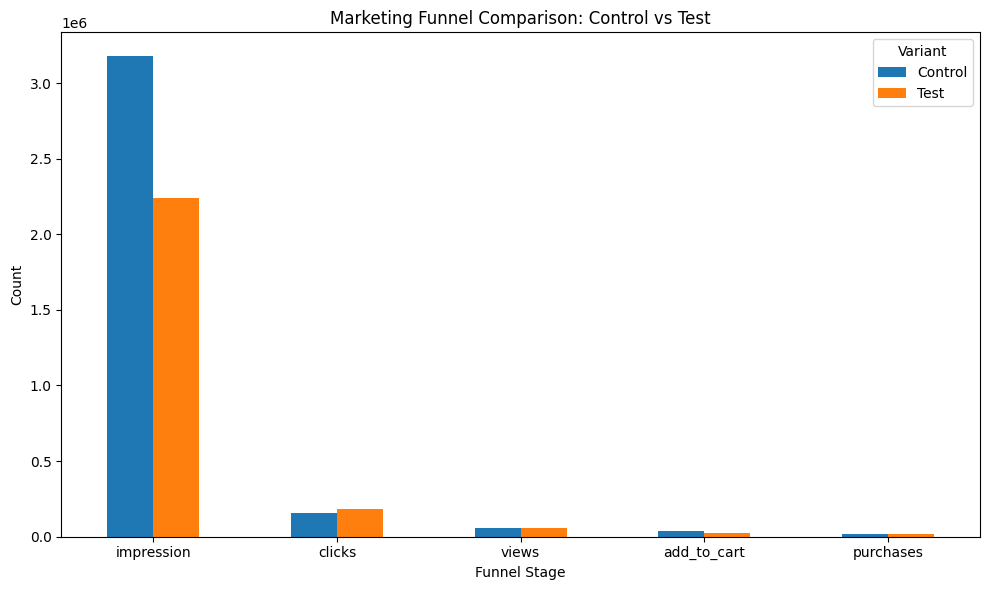

In [49]:
funnel_plot.T.plot(kind="bar", figsize=(10,6))
plt.title("Marketing Funnel Comparison: Control vs Test")
plt.xlabel("Funnel Stage")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Variant")
plt.tight_layout()
plt.show()

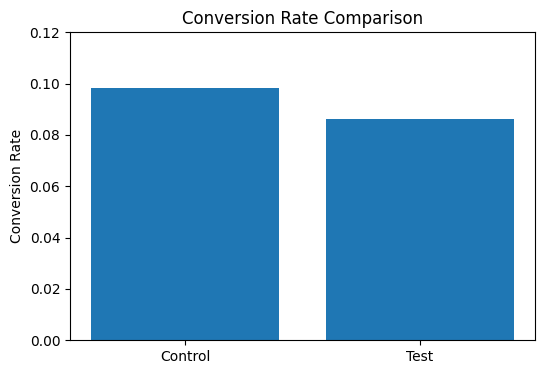

In [57]:
plt.figure(figsize=(6,4))
plt.bar(
    funnel["variant"],
    funnel["conversion_rate"]
)
plt.title("Conversion Rate Comparison")
plt.ylabel("Conversion Rate")
plt.ylim(0, 0.12)
plt.show()

# 📊 Marketing Funnel & A/B Testing Analysis

## 📌 Business Context
A performance marketing team tested a new campaign (**Test**) against an existing campaign (**Control**) to evaluate whether it improves conversion rate and marketing efficiency.  
The goal is to make a **data-driven decision** on whether the Test campaign should be scaled.

---

## 🎯 Objectives
- Compare **funnel performance** between Control and Test campaigns  
- Measure **conversion efficiency** and **cost effectiveness**
- Perform **statistical A/B testing** on conversion rates
- Provide a **clear business recommendation**

---

## 🧾 Dataset Overview
The dataset contains daily marketing metrics including:
- Impressions
- Website Clicks
- View Content
- Add to Cart
- Purchases
- Spend (USD)

Each row represents **daily campaign performance**, and campaigns are labeled as **Control** or **Test**.

---

## 🔄 Funnel Stages Analyzed
1. Impressions  
2. Clicks  
3. Views  
4. Add to Cart  
5. Purchases  

We analyze both **absolute counts** and **conversion rates** between stages.

---

## 📈 Key Metrics Defined
- **CTR (Click Through Rate)** = Clicks / Impressions  
- **View Rate** = Views / Clicks  
- **Add to Cart Rate** = Add to Cart / Views  
- **Conversion Rate** = Purchases / Clicks  
- **CPC (Cost per Click)** = Spend / Clicks  
- **CPA (Cost per Purchase)** = Spend / Purchases  

---

## 🧪 A/B Testing Methodology
- Statistical Test Used: **Two-tailed Z-test**
- Metric Tested: **Conversion Rate**
- Significance Level (α): **0.05**

### Hypotheses
- **H₀ (Null Hypothesis):** Control Conversion Rate = Test Conversion Rate  
- **H₁ (Alternative Hypothesis):** Control Conversion Rate ≠ Test Conversion Rate  

---

## 📊 Visual Analysis
The following visualizations are used to support the statistical findings:
- Funnel comparison (Control vs Test)
- Conversion rate comparison
- CPC vs CPA comparison
- Funnel drop-off rate analysis

These visuals help identify **where performance diverges** across the funnel.

---

## 🏁 Key Findings (Summary)
- Test campaign generates **higher CTR**
- Test campaign shows **significant drop-off in lower funnel stages**
- Conversion rate of Test is **statistically significantly lower**
- Test campaign has **higher CPA**, making it inefficient

---

## ✅ Final Business Decision
❌ **Do NOT scale the Test Campaign**

**Reason:**
- Lower conversion rate
- Higher cost per purchase
- Statistically significant difference (p < 0.05)

This decision is supported by **both statistical testing and visual analysis**.
